In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as stats

# O que eu quero responder ao final deste estudo?

1. Há correlação, ao nível municipal, entre o '% de votos' em Jair Bolsonaro em 2018 e o 'número de casos de covid 19' por 100 habitantes?

2. Testar a hipótese de que a média de casos de covid por 100 habitantes nos municipios em que Jair Bolsonaro foi vencedor em 2018 é superior a dos demais municípios.

3. Testar a hipótese de que a redução em pontos percentuais de votos de 2018 para 2022 foi maior nos municípios em que os casos de covid por 100 habitantes foram superiores a média nacional.


In [2]:
covid = pd.read_csv('arquivos/covid_municipios.csv')
eleicao18 = pd.read_csv('arquivos/eleicao18.csv')
eleicao22 = pd.read_csv('arquivos/eleicao22.csv')

In [3]:
eleicao18 = eleicao18[eleicao18.estado != 'ZZ'] #Remoção dos votos do exterior
eleicao22 = eleicao22[eleicao22.estado != 'ZZ']

In [4]:
covid = covid.sort_values(by=['municipio', 'estado'])
covid.reset_index(inplace=True)
covid = covid.drop(columns=['index'])

In [5]:
eleicao18 = eleicao18.sort_values(by=['municipio', 'estado'])
eleicao18.reset_index(inplace=True)
eleicao18 = eleicao18.drop(columns=['index'])

In [6]:
eleicao22 = eleicao22.sort_values(by=['municipio', 'estado'])
eleicao22.reset_index(inplace=True)
eleicao22 = eleicao22.drop(columns=['index'])

In [7]:
covid

,regiao,estado,municipio,populacao,casosAcumulado,obitosAcumulado
0,Centro-Oeste,GO,ABADIA DE GOIAS,8773,4013,49
1,Sudeste,MG,ABADIA DOS DOURADOS,6989,1941,20
2,Centro-Oeste,GO,ABADIANIA,20042,2199,55
3,Sudeste,MG,ABAETE,23237,4246,48
4,Norte,PA,ABAETETUBA,157698,11868,243
...,...,...,...,...,...,...
5565,Nordeste,BA,XIQUE-XIQUE,46483,3406,100
5566,Nordeste,PB,ZABELE,2240,314,1
5567,Sudeste,SP,ZACARIAS,2718,282,12
5568,Nordeste,MA,ZE DOCA,51714,6203,76


In [8]:
eleicao18

,regiao,estado,municipio,votos_Bolsonaro,votos_Haddad
0,Centro-Oeste,GO,ABADIA DE GOIAS,4285,1928
1,Sudeste,MG,ABADIA DOS DOURADOS,2117,1821
2,Centro-Oeste,GO,ABADIANIA,5204,1781
3,Sudeste,MG,ABAETE,7581,4289
4,Norte,PA,ABAETETUBA,19896,61646
...,...,...,...,...,...
5565,Nordeste,BA,XIQUE-XIQUE,4804,18982
5566,Nordeste,PB,ZABELE,247,1285
5567,Sudeste,SP,ZACARIAS,1132,457
5568,Nordeste,MA,ZE DOCA,4658,17495


In [9]:
eleicao22

,regiao,estado,municipio,votos_Bolsonaro,votos_Lula
0,Centro-Oeste,GO,ABADIA DE GOIAS,5394,3814
1,Sudeste,MG,ABADIA DOS DOURADOS,2160,2351
2,Centro-Oeste,GO,ABADIANIA,5759,2774
3,Sudeste,MG,ABAETE,7696,6302
4,Norte,PA,ABAETETUBA,25118,72313
...,...,...,...,...,...
5565,Nordeste,BA,XIQUE-XIQUE,5629,20301
5566,Nordeste,PB,ZABELE,241,1529
5567,Sudeste,SP,ZACARIAS,1116,720
5568,Nordeste,MA,ZE DOCA,6313,17461


In [10]:
compara_m = (eleicao18.municipio.values != covid.municipio.values).astype(int).sum()
compara_e = (eleicao18.estado.values != covid.estado.values).astype(int).sum()
print(compara_m + compara_e) # não há diferença entre os municípios em 'eleicao18' e 'covid'

0


In [11]:
compara_m = (eleicao22.municipio.values != covid.municipio.values).astype(int).sum()
compara_e = (eleicao22.estado.values != covid.estado.values).astype(int).sum()
print(compara_m + compara_e) # não há diferença entre os municípios em 'eleicao22' e 'covid'

0


In [12]:
votosJairBr18 = eleicao18['votos_Bolsonaro'].sum() / (eleicao18['votos_Bolsonaro'].sum() + eleicao18['votos_Haddad'].sum())
votosJairBr18 #Esse é o percentual de votos no BRASIL

0.5510208215786533

In [13]:
casosCovidBr = (covid['casosAcumulado'].sum() * 100) / covid['populacao'].sum()
casosCovidBr #Esse é o número de casos por 100 habitantes no BRASIL

17.413570611541793

In [14]:
dados_1 = covid[['regiao','estado','municipio','populacao']]
dados_1['casosAcumulado_100'] = (covid['casosAcumulado'] / covid['populacao'] * 100)
dados_1['votosBolsonaro18_pc'] = (eleicao18['votos_Bolsonaro'] / (eleicao18['votos_Bolsonaro'] + eleicao18['votos_Haddad']))
dados_1

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_2364\3502770239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_1['casosAcumulado_100'] = (covid['casosAcumulado'] / covid['populacao'] * 100)


,regiao,estado,municipio,populacao,casosAcumulado_100,votosBolsonaro18_pc
0,Centro-Oeste,GO,ABADIA DE GOIAS,8773,45.742619,0.689683
1,Sudeste,MG,ABADIA DOS DOURADOS,6989,27.772213,0.537583
2,Centro-Oeste,GO,ABADIANIA,20042,10.971959,0.745025
3,Sudeste,MG,ABAETE,23237,18.272583,0.638669
4,Norte,PA,ABAETETUBA,157698,7.525777,0.243997
...,...,...,...,...,...,...
5565,Nordeste,BA,XIQUE-XIQUE,46483,7.327410,0.201968
5566,Nordeste,PB,ZABELE,2240,14.017857,0.161227
5567,Sudeste,SP,ZACARIAS,2718,10.375276,0.712398
5568,Nordeste,MA,ZE DOCA,51714,11.994818,0.210265


In [15]:
dados_1.describe()

,populacao,casosAcumulado_100,votosBolsonaro18_pc
count,5.570000e+03,5570.000000,5570.000000
mean,3.772839e+04,18.328998,0.465389
std,2.214581e+05,9.861333,0.221825
min,7.810000e+02,0.172284,0.020082
25%,5.446500e+03,10.522506,0.253509
50%,1.163100e+04,16.856376,0.494754
75%,2.549050e+04,25.103314,0.655476
max,1.225202e+07,65.063055,0.929622


###  Definindo as classes (por faixa de população)
#### Regra de Sturges

# $k = 1 + \frac {10}{3}\log_{10}n$

In [16]:
n = dados_1.shape[0]

k = 1 + (10 /3) * np.log10(n)

k = int(k.round(0))
k

13

In [17]:
#Tabela de frequências
frequencia = pd.value_counts(
  pd.cut(
    x = dados_1.casosAcumulado_100,
    bins = k,
    include_lowest = True
  ),
  sort = False
)
percentual = pd.value_counts(
  pd.cut(
    x = dados_1.casosAcumulado_100,
    bins = k,
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(0.106, 5.164]",323,0.057989
"(5.164, 10.155]",971,0.174327
"(10.155, 15.147]",1154,0.207181
"(15.147, 20.139]",932,0.167325
"(20.139, 25.13]",802,0.143986
"(25.13, 30.122]",657,0.117953
"(30.122, 35.113]",407,0.073070
"(35.113, 40.105]",191,0.034291
"(40.105, 45.097]",88,0.015799
"(45.097, 50.088]",29,0.005206


In [18]:
dados_1['casosAcumulado_100'].describe()

count    5570.000000
mean       18.328998
std         9.861333
min         0.172284
25%        10.522506
50%        16.856376
75%        25.103314
max        65.063055
Name: casosAcumulado_100, dtype: float64

<AxesSubplot: title={'center': 'Distribuição de Frequências dos Municipios por Casos Acumulados por 100 habitantes'}, xlabel='Casos Confirmado por 100 habitantes', ylabel='Contagem de Municípios'>

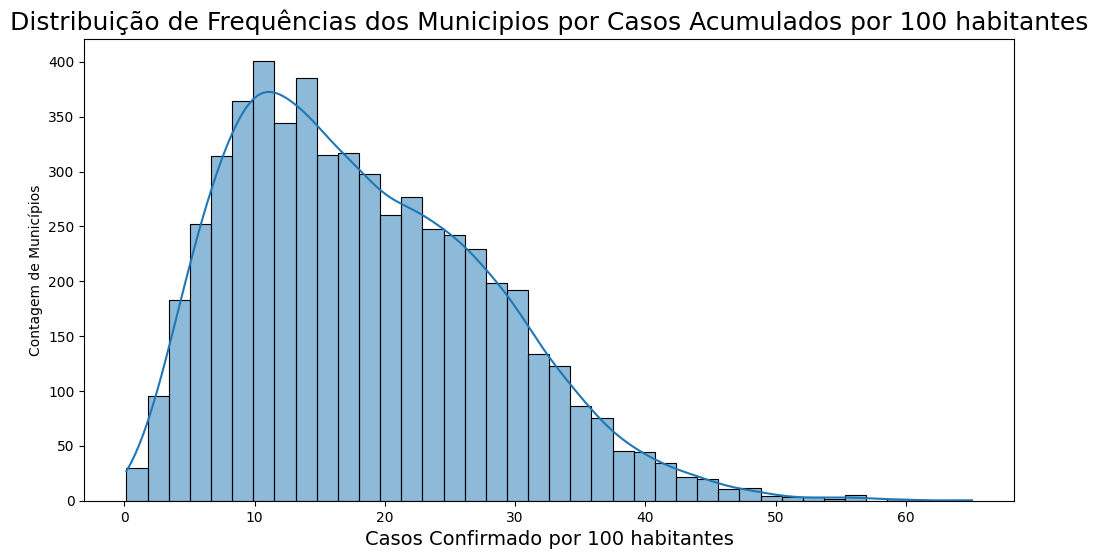

In [19]:
a1 = sns.histplot(dados_1.casosAcumulado_100, kde=True)
a1.figure.set_size_inches(12, 6)
a1.set_title('Distribuição de Frequências dos Municipios por Casos Acumulados por 100 habitantes', fontsize=18)
a1.set_xlabel('Casos Confirmado por 100 habitantes', fontsize=14)
a1.set_ylabel('Contagem de Municípios')
a1

<AxesSubplot: title={'center': 'Distribuição de Frequências dos Municipios por Casos Acumulados por 100 habitantes'}, xlabel='Casos Confirmado por 100 habitantes', ylabel='Contagem de Municípios'>

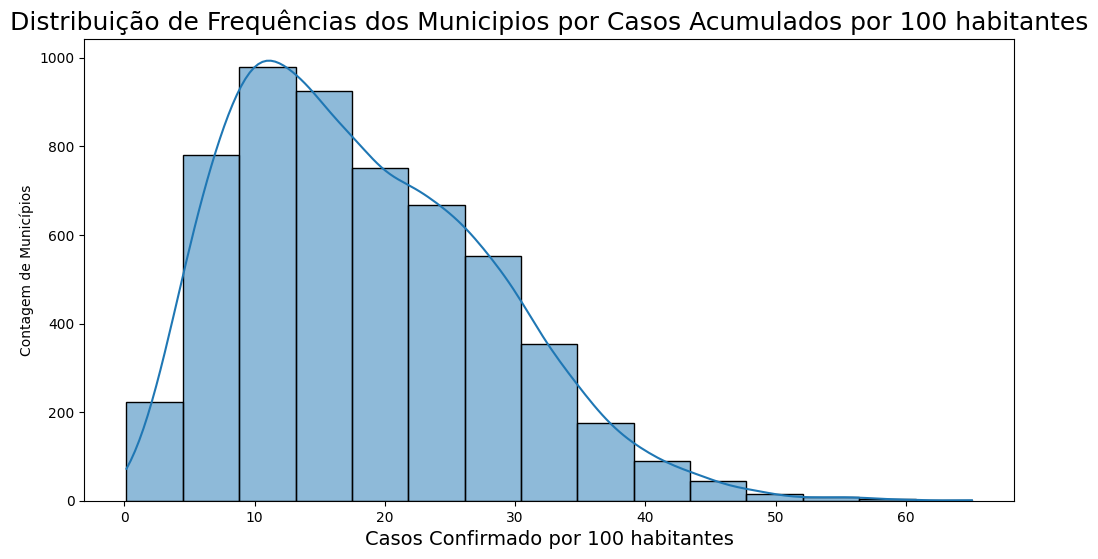

In [20]:
a1 = sns.histplot(dados_1.casosAcumulado_100, bins=15, kde=True)
a1.figure.set_size_inches(12, 6)
a1.set_title('Distribuição de Frequências dos Municipios por Casos Acumulados por 100 habitantes', fontsize=18)
a1.set_xlabel('Casos Confirmado por 100 habitantes', fontsize=14)
a1.set_ylabel('Contagem de Municípios')
a1

<AxesSubplot: title={'center': 'BoxPlot com a Distribuição dos municípios segundo o número de Casos por 100 habitantes'}, xlabel='Número de Casos'>

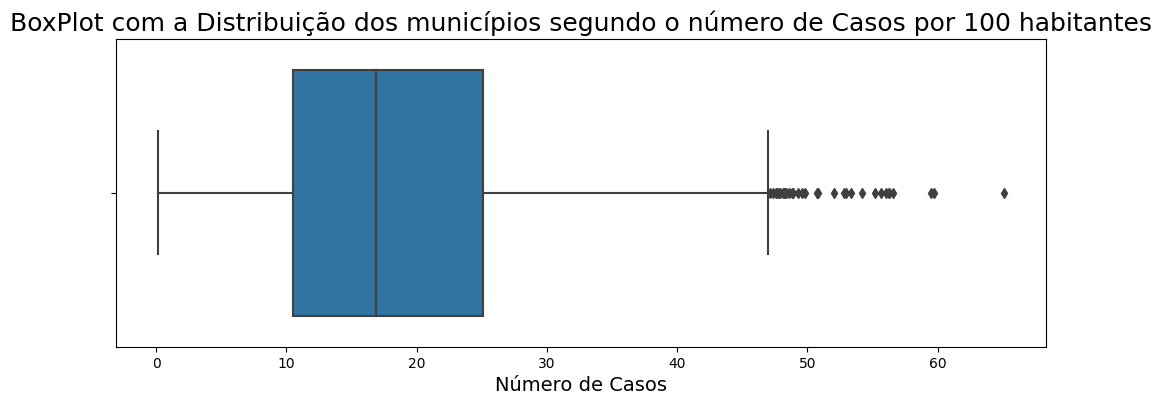

In [21]:
a2 = sns.boxplot(x = 'casosAcumulado_100', data = dados_1, orient = 'h')
a2.figure.set_size_inches(12, 4)
a2.set_title('BoxPlot com a Distribuição dos municípios segundo o número de Casos por 100 habitantes', fontsize=18)
a2.set_xlabel('Número de Casos', fontsize=14)
a2

In [22]:
def box_hist(data_1):
    sns.set(style="dark")
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})

    box_1 = sns.boxplot(data = data_1, ax = ax_box, orient = 'h', color = 'greenyellow')
    box_2 = sns.histplot(data = data_1, ax = ax_hist, color = 'navy')

    box_2.set_xlabel('Casos Confirmado por 100 habitantes', fontsize=14)
    box_2.set_ylabel('Contagem de Municípios')

    ax_box.set(yticks=[])
    sns.despine(ax = ax_hist)
    sns.despine(ax = ax_box, left=True)  

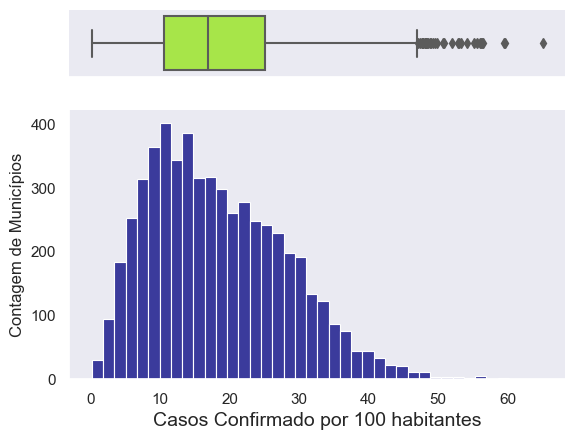

In [23]:
box_hist(dados_1['casosAcumulado_100'])

### Há uma evidente Assimetria à Direita e a existência de alguns 'outliers'
Remoção dos outliers por por Intervalo InterQuartil (apenas para visualização - e exercício - não faremos a remoção de outliers no estudo por entender que não serão realizadas amostragens uma vez que trabalhamos com um população finita, 5570 municípios)

In [24]:
iiq = np.percentile(dados_1['casosAcumulado_100'],75) - np.percentile(dados_1['casosAcumulado_100'],25)
iiq_inf = 0
iiq_sup = (np.percentile(dados_1['casosAcumulado_100'],75) + 1.5 * iiq).round(0)
print('Casos Acumulado por 100 hab entre' + ' : ' + str(iiq_inf) + ' -> ' + str(iiq_sup))


Casos Acumulado por 100 hab entre : 0 -> 47.0


In [25]:
dados_1.query('casosAcumulado_100 >= 47')

,regiao,estado,municipio,populacao,casosAcumulado_100,votosBolsonaro18_pc
70,Sul,SC,AGUAS FRIAS,2366,48.140321,0.536420
152,Centro-Oeste,GO,ALTO HORIZONTE,6414,48.799501,0.636697
156,Sul,PR,ALTO PARAISO,2741,50.820868,0.581608
305,Centro-Oeste,GO,ARACU,3522,56.530380,0.598032
430,Centro-Oeste,GO,AURILANDIA,3120,48.910256,0.462882
532,Sul,RS,BARRA FUNDA,2539,47.892871,0.616699
998,Centro-Oeste,GO,CAMPOS VERDES,2141,65.063055,0.274037
1317,Sul,RS,COLORADO,3175,47.811024,0.727461
1397,Sul,RS,CORONEL BARROS,2519,49.781659,0.660560
1416,Centro-Oeste,GO,CORREGO DO OURO,2327,48.603352,0.770997


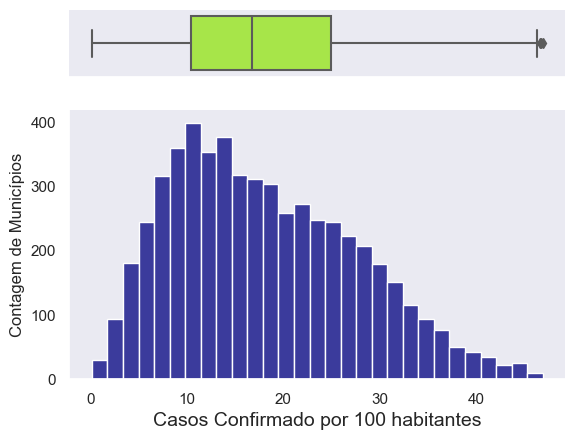

In [26]:
box_hist(dados_1.query('casosAcumulado_100 < 47')['casosAcumulado_100'])

In [27]:
dados_1.corr(numeric_only=True).casosAcumulado_100

populacao             -0.015818
casosAcumulado_100     1.000000
votosBolsonaro18_pc    0.522468
Name: casosAcumulado_100, dtype: float64

In [28]:
#Classificando os municipios em 'Bolsonaristas' de acordo com a Vitoria de Jair Bolsonaro na eleição de 2018;
dados_1['vitoriaJair'] = 0
for i in range(len(dados_1.votosBolsonaro18_pc)):
    dados_1['vitoriaJair'][i] = 1 if dados_1.votosBolsonaro18_pc[i] > 0.5 else 0

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_2364\695491288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_1['vitoriaJair'][i] = 1 if dados_1.votosBolsonaro18_pc[i] > 0.5 else 0


In [29]:
dadosJair = dados_1[['regiao','estado', 'municipio', 'populacao', 'casosAcumulado_100', 'votosBolsonaro18_pc']][dados_1.vitoriaJair == 1]
dadosHaddad = dados_1[['regiao','estado', 'municipio', 'populacao', 'casosAcumulado_100', 'votosBolsonaro18_pc']][dados_1.vitoriaJair == 0]
dadosJair.reset_index(inplace=True)
dadosJair = dadosJair.drop(columns='index')
dadosHaddad.reset_index(inplace=True)
dadosHaddad = dadosHaddad.drop(columns='index')

In [30]:
dadosJair.shape

(2760, 6)

In [31]:
dadosHaddad.shape

(2810, 6)

Como o estudo se refere aos 5570 municipios em uma data específica 17.01.2023 não precisamos realizar amostragem uma vez que temos os dados populacionais;
Entretanto para efeito de simetria de comparação vou selecionar uma amostra de municipios com o mesmo tamanho que a classe minoritária.

In [32]:
amostraHaddad = dadosHaddad.sample(n=len(dadosJair.municipio))

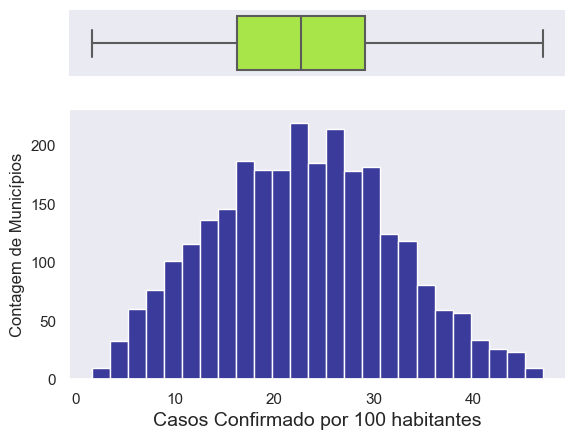

In [33]:
box_hist(dadosJair.query('casosAcumulado_100 < 47')['casosAcumulado_100'])

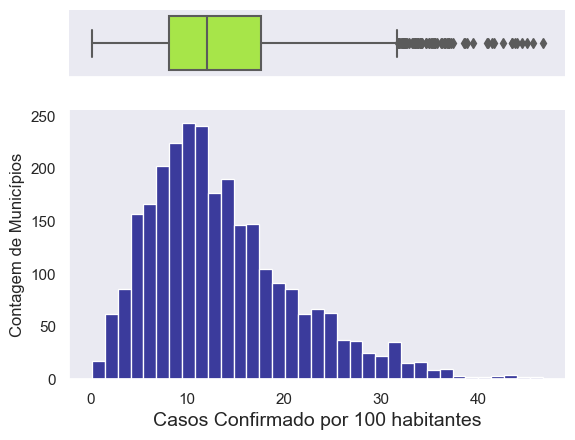

In [34]:
box_hist(amostraHaddad.query('casosAcumulado_100 < 47')['casosAcumulado_100'])

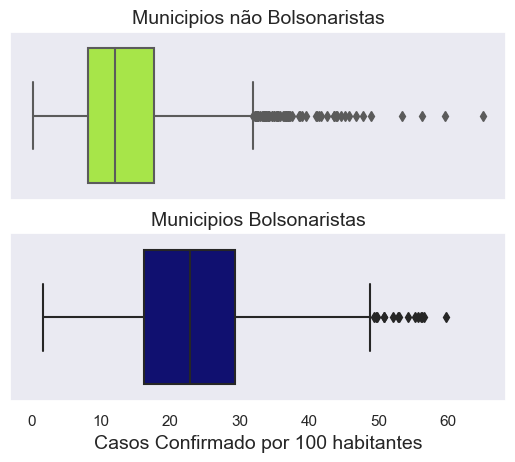

In [35]:
sns.set(style="dark")

data_1 = amostraHaddad['casosAcumulado_100']
data_2 = dadosJair['casosAcumulado_100']

f, (ax_box1, ax_box2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})

box_1 = sns.boxplot(data = data_1, ax = ax_box1, orient = 'h', color = 'greenyellow')
box_2 = sns.boxplot(data = data_2, ax = ax_box2, orient = 'h', color = 'navy')

box_1.set_title('Municipios não Bolsonaristas', fontsize=14)
box_2.set_title('Municipios Bolsonaristas', fontsize=14)

box_2.set_xlabel('Casos Confirmado por 100 habitantes', fontsize=14)

ax_box1.set(yticks=[])
ax_box2.set(yticks=[])

box_1 = box_1

In [36]:
dataset = {
    'bolsonaristas' : dadosJair.casosAcumulado_100,
    'n_bolsonaristas' : amostraHaddad.casosAcumulado_100
}
dataset = pd.DataFrame(dataset)


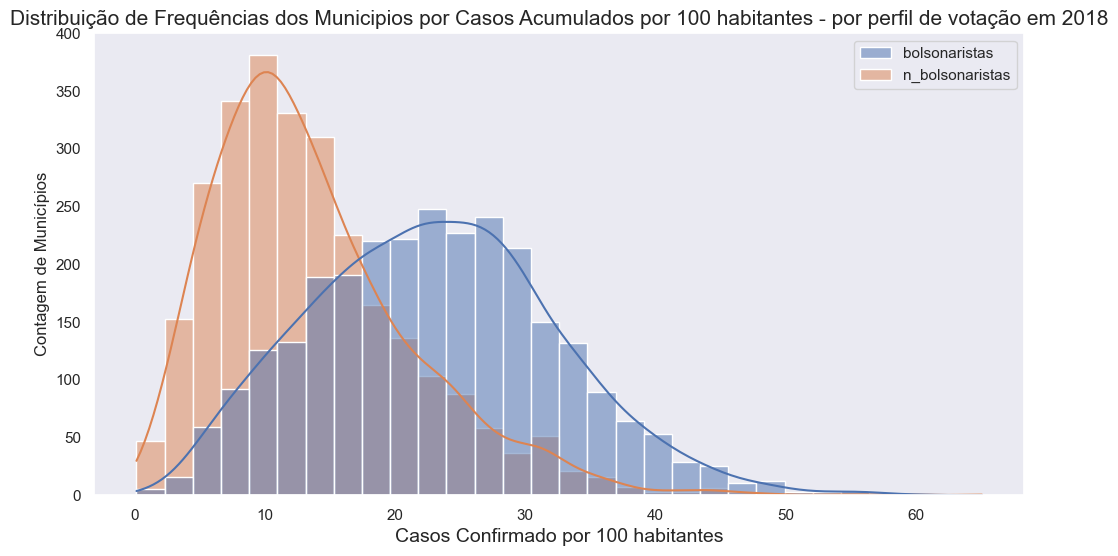

In [37]:
a3 = sns.histplot(dataset, kde=True, bins = 30)
a3.figure.set_size_inches(12, 6)
a3.set_title('Distribuição de Frequências dos Municipios por Casos Acumulados por 100 habitantes - por perfil de votação em 2018', fontsize=15)
a3.set_xlabel('Casos Confirmado por 100 habitantes', fontsize=14)
a3.set_ylabel('Contagem de Municípios')
a3 = a3

## <font color=red > Primeiro Objetivo:</font>

#### 1. Há correlação, ao nível municipal, entre o '% de votos' em Jair Bolsonaro em 2018 e o 'número de casos de covid 19' por 100 habitantes?

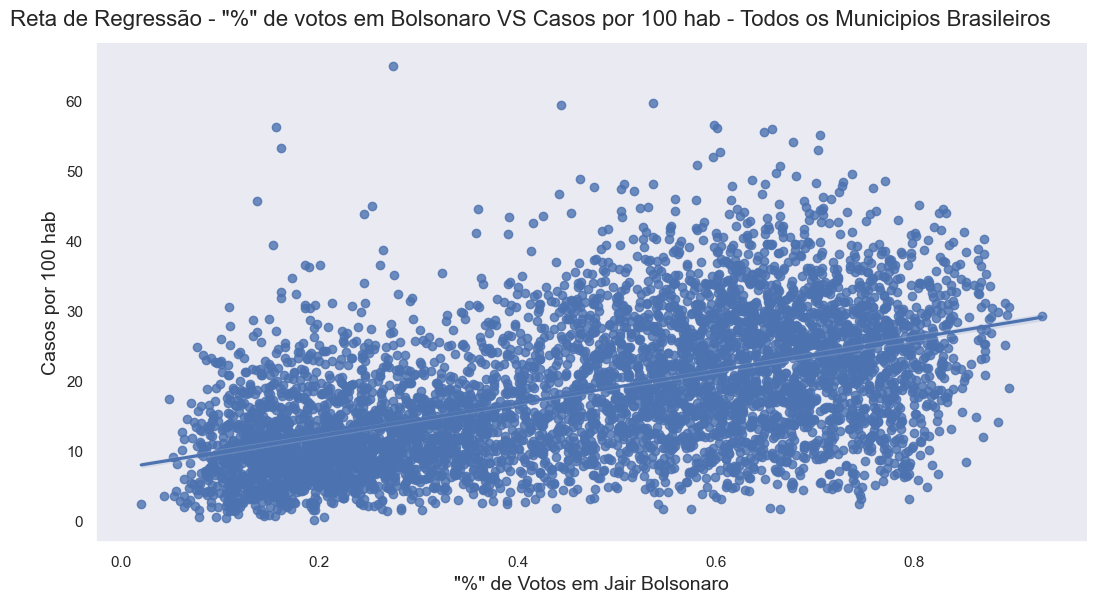

In [38]:
ax = sns.lmplot(x = 'votosBolsonaro18_pc', y = 'casosAcumulado_100', data=dados_1, )
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - "%" de votos em Bolsonaro VS Casos por 100 hab - Todos os Municipios Brasileiros', fontsize=16, y=1.02)
ax.set_xlabels('"%" de Votos em Jair Bolsonaro', fontsize=14)
ax.set_ylabels('Casos por 100 hab', fontsize=14)
ax = ax

In [39]:
pd.DataFrame(dados_1.corr(numeric_only=True).round(2).casosAcumulado_100)


,casosAcumulado_100
populacao,-0.02
casosAcumulado_100,1.00
votosBolsonaro18_pc,0.52
vitoriaJair,0.48


Como o Coeficinete de correlação é igual 0.52, para a relação entre os casos por 100 habitantes e o percentual de votos para Jair Bolsonaro, podemos assumir que os dados indicam uma correlação moderada.

O que pode ser observado no gráfico de dispersão através das nuvens, amplamente dispersas ao redor da reta de regressão, reta que permite observarmos que há um incremento no número de casos com o aumento do percentual de votos.

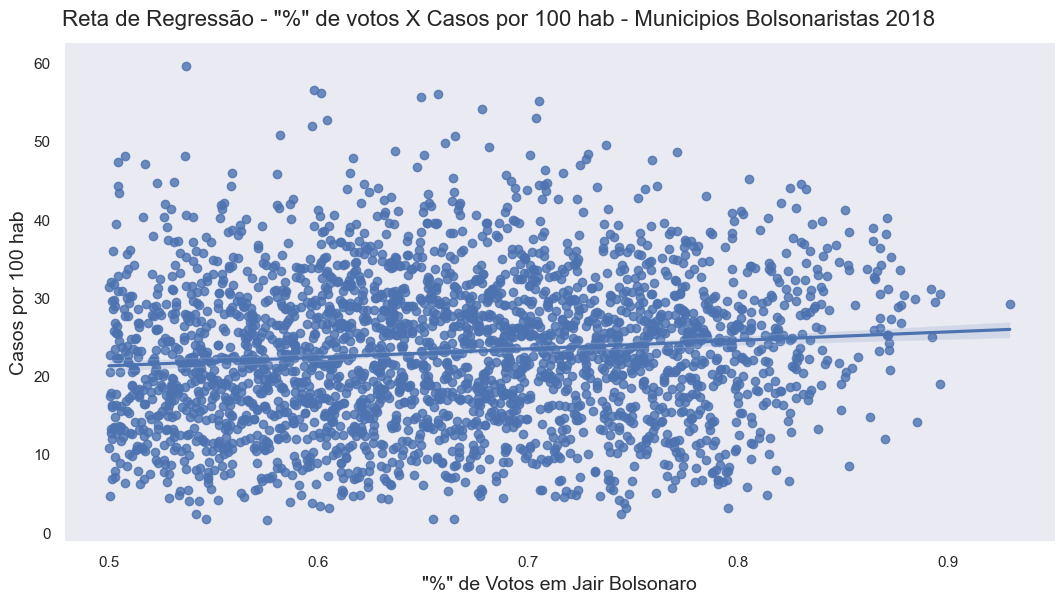

In [40]:
ax = sns.lmplot(x = 'votosBolsonaro18_pc', y = 'casosAcumulado_100', data=dadosJair)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - "%" de votos X Casos por 100 hab - Municipios Bolsonaristas 2018', fontsize=16, y=1.02)
ax.set_xlabels('"%" de Votos em Jair Bolsonaro', fontsize=14)
ax.set_ylabels('Casos por 100 hab', fontsize=14)
ax = ax

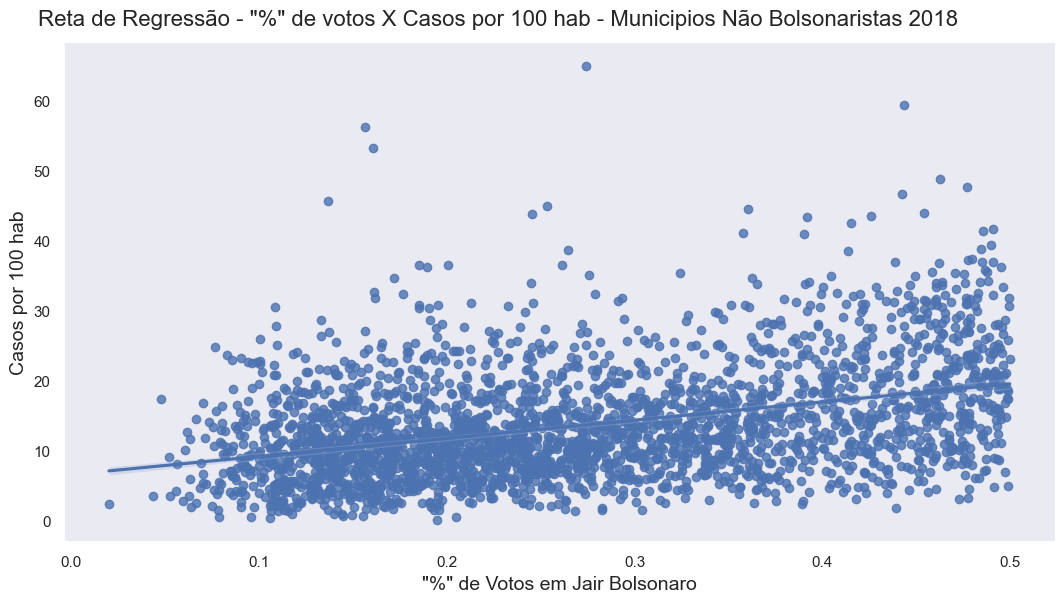

In [41]:
ax = sns.lmplot(x = 'votosBolsonaro18_pc', y = 'casosAcumulado_100', data=amostraHaddad)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - "%" de votos X Casos por 100 hab - Municipios Não Bolsonaristas 2018', fontsize=16, y=1.02)
ax.set_xlabels('"%" de Votos em Jair Bolsonaro', fontsize=14)
ax.set_ylabels('Casos por 100 hab', fontsize=14)
ax = ax

## <font color=red> Conclusão do Objetivo 1  </font>

#### É possível afirmar que <font color=darkred>existe uma correlação positiva e moderada (0,52)</font> entre o número de casos de covid por 100 habitantes e o percentual de votos pró Jair Bolsonaro, no segundo turno da eleição de 2018, nos município brasileiros.

## <font color=red>Tarefa adicional</font>

Estou trabalhando com um população finita e posso utilizar todos os dados - o que representam que não preciso estimar por amostragem e tenho mais de 2700 elementos em cada grupo -  como o número de elementos é maior do que 30 utilizarei as estatísticas normalizadas - mas para carater de demonstração e teste vou testar a hipótese de que as distribuições provem de um conjunto de dados normalmente distribuido.

In [42]:
from scipy.stats import normaltest, norm

##### 1º Teste - normalidade das distribuições
##### Rejeitar Normalidade se o valor $p\leq 0,05$

In [43]:
# 1º Teste - Testando a normalidade das distribuições
stat_test, p_valor = normaltest(dadosJair['casosAcumulado_100'])
print(stat_test)
print(p_valor)
p_valor <= 0.05

36.292758155444986
1.3156116179795339e-08


True

In [44]:
# 1º Teste - Testando a normalidade das distribuições
stat_test, p_valor = normaltest(amostraHaddad['casosAcumulado_100'])
print(stat_test)
print(p_valor)
p_valor <= 0.05

593.2898240598911
1.474862796711116e-129


True

Rejeitada a hipótese de que as distribuições provêm de uma 'normal'.

## <font color=red>Segundo Objetivo:  </font>
### 2. Testar a hipótese de que a média de casos de covid por 100 habitantes nos municípios em que Jair Bolsonaro foi vencedor em 2018 é superior a dos demais municípios.

Definição de $H_0$ e $H_a$:

$H_0$ : Hipótese Nula de que a média do número de contaminados por 100 habitantes nos municípios Bolsonaristas é menor ou igual a média do número de contaminados por 100 habitantes nos municípios Não Bolsonaristas;

$H_a$ : Hipótese Alternativa de que a média do número de contaminados por 100 habitantes nos municípios Bolsonaristas maior do que a média do número de contaminados por 100 habitantes nos municípios Não Bolsonaristas;

## $H_0: \mu_b \leq \mu_n$

## $H_a: \mu_b > \mu_n$

### Definindo a significância dos testes ($\alpha$)

$\alpha$ = 0.01

Significância = 1 %
 
Confiança = 99 %

In [45]:
significancia = 0.01
confianca = 1 - significancia

In [46]:
z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

Estatistica de teste - Comparação entre médias de duas distribuições

# $$z = \frac{\bar{\mu}_1 - \bar{\mu}_2}{{\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}}}$$


In [47]:
#dadosJair
u1 = dadosJair.casosAcumulado_100.mean()
std1 = dadosJair.casosAcumulado_100.std()
n1 = len(dadosJair.casosAcumulado_100)
print(u1, std1, n1)

23.067890185598785 9.436628173911862 2760


In [48]:
#amostraHaddad
u2 = amostraHaddad.casosAcumulado_100.mean()
std2 = amostraHaddad.casosAcumulado_100.std()
n2 = len(amostraHaddad.casosAcumulado_100)
print(u2, std2, n2)

13.692605426182595 7.858368167652635 2760


In [49]:
z = (u1 - u2) / np.sqrt((std1**2/n1)+(std2**2/n2))
z

40.108158251642

In [50]:
if z > z_alpha:
    print ("Devemos rejeitar a hipótese nula")
else:
    print ("Não podemos rejeitar a hipótese nula")

Devemos rejeitar a hipótese nula


## <font color=red> Conclusão do Objetivo 2  </font>

#### Como o valor de z é superior a estatística de teste, e portanto pertence a área de Rejeição, devemos rejeitar a hipótese de que a Média do Número de Casos de covid por 100 habitantes nos múnicipios bolsonaristas é menor ou igual a dos municípios não bolsonaristas, e assumir portanto que:  <font color = darkred>"Com 99% de confiança a Média de Casos de Covid por 100 habitantes, registrada até 17.01.2023, nos municípios em que Jair Bolsonaro foi vitorioso, no segundo turno da eleição de 2018, é superior a Média de Casos dos demais municípios"</font>

## <font color=red> Terceiro Objetivo: </font>
### 3. Testar a hipótese de que a redução em pontos percentuais de votos pró Jair Bolsonaro, de 2018 para 2022, foi maior nos municípios em que os casos de covid por 100 habitantes foram superiores a média nacional.

Definição de $H_0$ e $H_a$:

$H_0$ : Hipótese Nula de a redução, em pontos percentuais, dos votos pró Jair Bolsonaro, de 2018 para 2022, nos municípios onde o número de casos de covid por 100 habitante é maior ou igual a média nacional, é menor ou igual a redução desse número nos municipíos com números de casos por 100 habitantes menores que a média nacional;

$H_a$ : Hipótese Alternativa de que a redução, em pontos percentuais, dos votos pró Jair Bolsonaro, de 2018 para 2022, nos municípios onde o número de casos de covid por 100 habitante é maior ou igual a média nacional, é maior do que a redução desse percentual nos municipíos com menores médias de casos por 100 habitantes;

## $H_0: Red_M \leq Red_m$

## $H_a: Red_M > Red_m$

In [51]:
dados_2 = covid[['regiao','estado','municipio','populacao']]
dados_2['casosAcumulado_100'] = (covid['casosAcumulado'] / covid['populacao'] * 100)
dados_2['votosBolsonaro18_pc'] = (eleicao18['votos_Bolsonaro'] / (eleicao18['votos_Bolsonaro'] + eleicao18['votos_Haddad']))
dados_2['votosBolsonaro22_pc'] = (eleicao22['votos_Bolsonaro'] / (eleicao22['votos_Bolsonaro'] + eleicao22['votos_Lula']))
dados_2['red_votos'] = (dados_2.votosBolsonaro18_pc - dados_2.votosBolsonaro22_pc)

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_2364\309065480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2['casosAcumulado_100'] = (covid['casosAcumulado'] / covid['populacao'] * 100)


In [52]:
#Classificando os municipios em 'maiorCovid' de acordo com o numero de casos por 100 habitantes ser maior que o valor nacional;
dados_2['maisCovid'] = 0
for i in range(len(dados_2.casosAcumulado_100)):
    dados_2['maisCovid'][i] = 1 if dados_2.casosAcumulado_100[i] >= casosCovidBr else 0

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_2364\3532648388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2['maisCovid'][i] = 1 if dados_2.casosAcumulado_100[i] >= casosCovidBr else 0


In [53]:
dados_2

,regiao,estado,municipio,populacao,casosAcumulado_100,votosBolsonaro18_pc,votosBolsonaro22_pc,red_votos,maisCovid
0,Centro-Oeste,GO,ABADIA DE GOIAS,8773,45.742619,0.689683,0.585795,0.103888,1
1,Sudeste,MG,ABADIA DOS DOURADOS,6989,27.772213,0.537583,0.478830,0.058753,1
2,Centro-Oeste,GO,ABADIANIA,20042,10.971959,0.745025,0.674909,0.070116,0
3,Sudeste,MG,ABAETE,23237,18.272583,0.638669,0.549793,0.088876,1
4,Norte,PA,ABAETETUBA,157698,7.525777,0.243997,0.257803,-0.013806,0
...,...,...,...,...,...,...,...,...,...
5565,Nordeste,BA,XIQUE-XIQUE,46483,7.327410,0.201968,0.217084,-0.015117,0
5566,Nordeste,PB,ZABELE,2240,14.017857,0.161227,0.136158,0.025069,0
5567,Sudeste,SP,ZACARIAS,2718,10.375276,0.712398,0.607843,0.104555,0
5568,Nordeste,MA,ZE DOCA,51714,11.994818,0.210265,0.265542,-0.055277,0


In [54]:
dadosMaisCovid = dados_2[['regiao','estado', 'municipio', 'populacao', 'red_votos']][dados_2.maisCovid == 1]
dadosMenosCovid = dados_2[['regiao','estado', 'municipio', 'populacao', 'red_votos']][dados_2.maisCovid == 0]
dadosMaisCovid.reset_index(inplace=True)
dadosMaisCovid = dadosMaisCovid.drop(columns='index')
dadosMenosCovid.reset_index(inplace=True)
dadosMenosCovid = dadosMenosCovid.drop(columns='index')

In [55]:
dadosMaisCovid.shape

(2674, 5)

In [56]:
dadosMenosCovid.shape

(2896, 5)

Novamente, como o estudo se refere aos 5570 municipios em uma data específica 17.01.2023 não precisamos realizar amostragem uma vez que temos os dados populacionais;
Entretanto para efeito de simetria de comparação vou selecionar uma amostra de municipios com o mesmo tamanho que a classe minoritária.

In [57]:
amostraMenosCovid = dadosMenosCovid.sample( n = len(dadosMaisCovid.municipio))

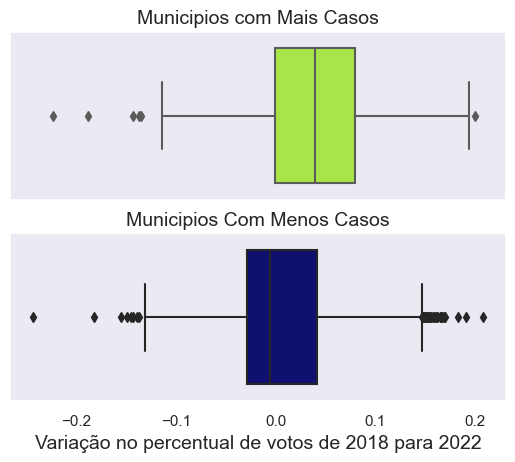

In [58]:
sns.set(style="dark")

data_1 = dadosMaisCovid['red_votos']
data_2 = amostraMenosCovid['red_votos']

f, (ax_box1, ax_box2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})

box_1 = sns.boxplot(data = data_1, ax = ax_box1, orient = 'h', color = 'greenyellow')
box_2 = sns.boxplot(data = data_2, ax = ax_box2, orient = 'h', color = 'navy')

box_1.set_title('Municipios com Mais Casos', fontsize=14)
box_2.set_title('Municipios Com Menos Casos', fontsize=14)

box_2.set_xlabel('Variação no percentual de votos de 2018 para 2022', fontsize=14)

ax_box1.set(yticks=[])
ax_box2.set(yticks=[])

box_1 = box_1

In [59]:
dataset = {
    'MaisCovid' : dadosMaisCovid.red_votos,
    'MenosCovid' : amostraMenosCovid.red_votos
}
dataset = pd.DataFrame(dataset)

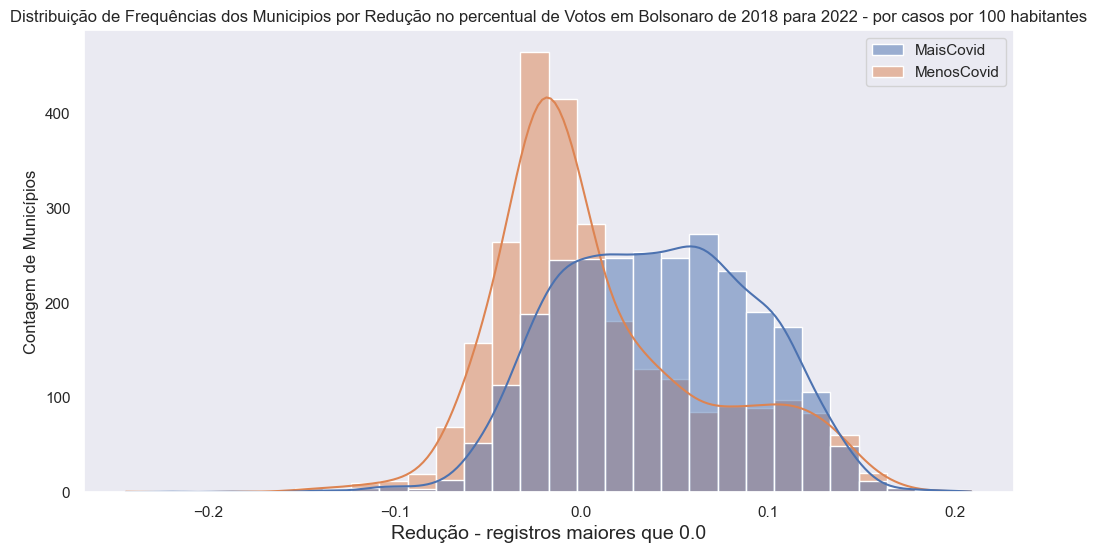

In [60]:
a3 = sns.histplot(dataset, kde=True, bins = 30)
a3.figure.set_size_inches(12, 6)
a3.set_title('Distribuição de Frequências dos Municipios por Redução no percentual de Votos em Bolsonaro de 2018 para 2022 - por casos por 100 habitantes', fontsize=12)
a3.set_xlabel('Redução - registros maiores que 0.0', fontsize=14)
a3.set_ylabel('Contagem de Municípios')
a3 = a3

### Mantida a significância dos testes ($\alpha$)

$\alpha$ = 0.01$

Significância = 1 %
 
Confiança = 99 %

In [61]:
# O que mantem o valor para rejeição
z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

Estatistica de teste - Comparação entre médias de duas distribuições

# $$z = \frac{\bar{\mu}_1 - \bar{\mu}_2}{{\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}}}$$


In [62]:
#dadosMaisCovid
u1 = dadosMaisCovid.red_votos.mean()
std1 = dadosMaisCovid.red_votos.std()
n1 = len(dadosMaisCovid.red_votos)
print(u1, std1, n1)

0.040229659649184686 0.05204873624478904 2674


In [63]:
#amostraMenosCovid
u2 = amostraMenosCovid.red_votos.mean()
std2 = amostraMenosCovid.red_votos.std()
n2 = len(amostraMenosCovid.red_votos)
print(u2, std2, n2)

0.009830703650552487 0.05731911123611937 2674


In [64]:
z = (u1 - u2) / np.sqrt((std1**2/n1)+(std2**2/n2))
z

20.303037834710427

In [65]:
if z > z_alpha:
    print ("Devemos rejeitar a hipótese nula")
else:
    print ("Não podemos rejeitar a hipótese nula")

Devemos rejeitar a hipótese nula


## <font color=red> Conclusão do Objetivo 3  </font>

#### Como o valor de z é superior a estatística de teste, e portanto pertence a área de Rejeição, devemos rejeitar a hipótese de que a redução, em pontos percentuais, dos votos pró Jair Bolsonaro, de 2018 para 2022, nos municípios onde o número de casos de covid por 100 habitante é superior a média nacional, é menor ou igual a redução desse número nos municipíos com números de casos por 100 habitantes menores que a média nacional, e assumir portanto que: <font color = darkred>"Com 99% de confiança, a redução ,em pontos percentuais, dos votos pró Jair Bolsonaro, de 2018 para 2022, observada nos municípios com número de casos por 100 habitantes maiores que a média nacional é superior a dos demais municípios"</font>